In [ ]:
import tensorflow as tf

2024-08-17 14:33:39.056862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 14:33:39.098804: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 14:33:39.109673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-17 14:33:39.167547: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-17 14:33:39.975628: W tensorflow/compiler/tf2

In [ ]:
gpus = tf.config.list_physical_devices("GPU")
print("Found a GPU with the name:", gpus)

Found a GPU with the name: []


2024-08-17 14:33:40.842103: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-08-17 14:33:40.842163: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: gabriel-desktop
2024-08-17 14:33:40.842168: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: gabriel-desktop
2024-08-17 14:33:40.842233: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.90.7
2024-08-17 14:33:40.842249: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  555.42.02  Release Build  (dvs-builder@U16-I3-A03-02-4)  Mon May 13 17:10:33 UTC 2024
GC

In [ ]:
import pandas as pd
import numpy as np
#import cv2
import matplotlib.pyplot as plt
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import os, shutil # Library for navigating files
from keras import backend as K
from keras import backend, models, layers, optimizers, regularizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator# Library for data augmentation
from keras.preprocessing import image

np.random.seed(1)

In [ ]:

#from google.colab import drive  # Library to mount google drives
#drive.mount('/content/gdrive')
base_dir = '//home/gabriel/Desktop/msds696'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
df_train_path =os.path.join(base_dir, 'train_FD001.txt')
df_test_path = os.path.join(base_dir, 'test_FD001.txt')
columnnames=['unit number', 'time, in cycles', 'os1', 'os2', 'os3']
for i in range (23):
  columnnames.append(str(i))
df_train = pd.read_csv(df_train_path,sep=" ", header=None)
df_test = pd.read_csv(df_test_path,sep=" ", header=None)
df_train.columns= columnnames
df_test.columns= columnnames

In [ ]:
df_train = df_train.drop(columns=["21","22"])
df_test = df_test.drop(columns=["21","22"])

In [ ]:
unique_values_unit_number_train = df_train['unit number'].unique()

unique_values_unit_number_test = df_test['unit number'].unique()


In [ ]:
EOL_train=[]
for i in df_train['unit number']:
        EOL_train.append( ((df_train[df_train['unit number'] == i]["time, in cycles"]).values)[-1])

df_train["EOL"]=EOL_train

# Calculate "LR"
df_train["LR"] = df_train["time, in cycles"].div(df_train["EOL"])

df_train['label'] = pd.cut(df_train['LR'], bins=[0, 0.6, 0.8, np.inf], labels=[0, 1, 2], right=False)

#df_path.drop(columns=['unit number', 'EOL', 'LR'], inplace=True)


df_train.head()

,unit number,"time, in cycles",os1,os2,os3,0,1,2,3,4,...,14,15,16,17,18,19,20,EOL,LR,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,0.005208,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,0.010417,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,0.015625,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,0.020833,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,0.026042,0


In [ ]:
EOL_test=[]
for i in df_test['unit number']:
        EOL_test.append( ((df_test[df_test['unit number'] == i]["time, in cycles"]).values)[-1])

df_test["EOL"]=EOL_test

# Calculate "LR"
df_test["LR"] = df_test["time, in cycles"].div(df_test["EOL"])

df_test['label'] = pd.cut(df_test['LR'], bins=[0, 0.6, 0.8, np.inf], labels=[0, 1, 2], right=False)

#df_path.drop(columns=['unit number', 'EOL', 'LR'], inplace=True)


df_test.head()

,unit number,"time, in cycles",os1,os2,os3,0,1,2,3,4,...,14,15,16,17,18,19,20,EOL,LR,label
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,0.032258,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,0.064516,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,0.096774,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,0.129032,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,0.161290,0


In [ ]:
df_train['label'] = df_train.label.cat.codes
df_test['label'] = df_test.label.cat.codes

In [ ]:
columns_to_exclude = ['unit number','EOL','label', 'LR','os3','0','4','9','17','18','15']

# Create a new DataFrame with only the columns you want to scale
df_train_subset = df_train.drop(columns=columns_to_exclude)
for column_name in df_train_subset.columns:
    df_train[column_name] = (df_train[column_name] - df_train[column_name].min()) / (df_train[column_name].max() - df_train[column_name].min())

df_test_subset = df_test.drop(columns=columns_to_exclude)
for column_name in df_test_subset.columns:
    df_test_subset[column_name] = (df_test_subset[column_name] - df_test_subset[column_name].min()) / (df_test_subset[column_name].max() - df_test_subset[column_name].min())

In [ ]:

output_dir_train_0 = "//home/gabriel/Desktop/msds696/train/zero"
output_dir_train_1 = "//home/gabriel/Desktop/msds696/train/one"
output_dir_train_2 = "//home/gabriel/Desktop/msds696/train/two"
output_dir_test_0 = "//home/gabriel/Desktop/msds696/test/zero"
output_dir_test_1 = "//home/gabriel/Desktop/msds696/test/one"
output_dir_test_2 = "//home/gabriel/Desktop/msds696/test/two"

os.makedirs(output_dir_train_0 , exist_ok=True)
os.makedirs(output_dir_train_1, exist_ok=True)
os.makedirs(output_dir_train_2, exist_ok=True)
os.makedirs(output_dir_test_0 , exist_ok=True)
os.makedirs(output_dir_test_1, exist_ok=True)
os.makedirs(output_dir_test_2, exist_ok=True)



In [ ]:
df_train_list = []
df_test_list = []
for i in unique_values_unit_number_train:
    df_i = df_train[df_train['unit number'] == i]
    df_train_list.append(df_i)
for i in unique_values_unit_number_test:
    df_i = df_test[df_test['unit number'] == i]
    df_test_list.append(df_i)

In [ ]:


df_0_train = []
df_1_train = []
df_2_train = []
df_0_test = []
df_1_test = []
df_2_test = []
z = 0
o = 1
t = 2
exclude = ['label','unit number']



for x in df_train_list:

             df_1 = x[x['label'] == z]
             df_1 = df_1.drop(columns=  columns_to_exclude )
             df_2 = x[x['label'] == o]
             df_2 = df_2.drop(columns= columns_to_exclude )
             df_3 = x[x['label'] == t]
             df_3 = df_3.drop(columns= columns_to_exclude )


             df_0_train.append(df_1)
             df_1_train.append(df_2)
             df_2_train.append(df_3)
for y in df_test_list:

             df_1_test_sig = x[x['label'] == z]
             df_1_test_sig= df_1_test_sig.drop(columns= columns_to_exclude )

             df_2_test_sig  = x[x['label'] == o]
             df_2_test_sig= df_2_test_sig.drop(columns= columns_to_exclude )

             df_3_test_sig  = x[x['label'] == t]
             df_3_test_sig= df_3_test_sig.drop(columns= columns_to_exclude )


             df_0_test.append(df_1_test_sig )
             df_1_test.append(df_2_test_sig )
             df_2_test.append(df_3_test_sig )





In [ ]:
df_2_test[0].head()

,"time, in cycles",os1,os2,1,2,3,5,6,7,8,10,11,12,13,14,16,19,20
20590,0.440443,0.557471,0.583333,0.584337,0.584914,0.573599,1.0,0.558776,0.409091,0.220632,0.666667,0.464819,0.352941,0.234802,0.530589,0.583333,0.372093,0.297294
20591,0.443213,0.201149,0.333333,0.515060,0.514061,0.552330,1.0,0.446055,0.424242,0.186126,0.625000,0.466951,0.338235,0.196666,0.439400,0.416667,0.317829,0.354322
20592,0.445983,0.580460,0.500000,0.530120,0.516896,0.481263,1.0,0.560386,0.393939,0.186619,0.559524,0.332623,0.411765,0.205955,0.565217,0.500000,0.534884,0.510080
20593,0.448753,0.551724,0.750000,0.641566,0.491389,0.517218,1.0,0.400966,0.333333,0.226151,0.690476,0.511727,0.397059,0.230984,0.495575,0.666667,0.232558,0.360950
20594,0.451524,0.229885,0.166667,0.509036,0.480052,0.728224,1.0,0.368760,0.378788,0.203267,0.601190,0.509595,0.382353,0.224739,0.567141,0.583333,0.465116,0.280309


In [ ]:

for i in range (len(df_0_train )):
    filename = f'image_zero_{i}.png'
    for j in df_0_train:
        #j = j.drop(columns=exclude)
        j_array = j.to_numpy()
        uint_img = np.array(j_array * 255, dtype = np.uint8)
        img = Image.fromarray(uint_img)
        full_path = os.path.join(output_dir_train_0, filename)
        img.save(full_path)
for i in range (len(df_1_train )):
    filename = f'image_one_{i}.png'
    for j in df_1_train:
        #j = j.drop(columns=exclude)
        j_array = j.to_numpy()
        uint_img = np.array(j_array * 255, dtype = np.uint8)
        img = Image.fromarray(uint_img)
        full_path = os.path.join(output_dir_train_1, filename)
        img.save(full_path)
for i in range (len(df_2_train )):
    filename = f'image_two_{i}.png'
    for j in df_2_train:
        #j = j.drop(columns=exclude)
        j_array = j.to_numpy()
        uint_img = np.array(j_array * 255, dtype = np.uint8)
        img = Image.fromarray(uint_img)
        full_path = os.path.join(output_dir_train_2, filename)
        img.save(full_path)

In [ ]:
for i in range (len(df_0_test )):
    filename = f'image__{i}.png'
    for j in df_0_test:
        #j = j.drop(columns=exclude)
        j_array = j.to_numpy()
        uint_img = np.array(j_array * 255, dtype = np.uint8)
        img = Image.fromarray(uint_img)
        full_path = os.path.join(output_dir_test_0, filename)
        img.save(full_path)
for i in range (len(df_1_test )):
    filename= f'image__{i}.png'
    for j in df_1_test:
        #j = j.drop(columns=exclude)
        j_array = j.to_numpy()
        uint_img = np.array(j_array * 255, dtype = np.uint8)
        img = Image.fromarray(uint_img)
        full_path = os.path.join(output_dir_test_1, filename)
        img.save(full_path)
for i in range (len(df_2_test )):
    filename = f'image__{i}.png'
    for j in df_2_test:
        #j = j.drop(columns=exclude)
        j_array = j.to_numpy()
        uint_img = np.array(j_array * 255, dtype = np.uint8)
        img = Image.fromarray(uint_img)
        full_path = os.path.join(output_dir_test_2, filename)
        img.save(full_path)

In [ ]:
for category in ("zero", "one","two"):
  os.makedirs("//home/gabriel/Desktop/msds696/val/" + category)
  files = os.listdir("//home/gabriel/Desktop/msds696/train/" + category)
  np.random.shuffle(files)
  num_val_samples = int(0.2*len(files))
  val_files = files[-num_val_samples:]
  for fname in val_files:
    shutil.move("//home/gabriel/Desktop/msds696/train/" + category + "/" + fname,
                "//home/gabriel/Desktop/msds696/val/" + category + "/" + fname)

In [ ]:
# Check the number of files in each class dirrectory
print(len(os.listdir("//home/gabriel/Desktop/msds696/train/zero")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/train/one")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/train/two")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/val/zero")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/val/one")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/val/two")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/test/zero")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/test/one")))
print(len(os.listdir("//home/gabriel/Desktop/msds696/test/two")))

80
80
80
20
20
20
100
100
100


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # The directory where the train data is located
    target_size=(150, 150), # Reshape the image to 150 by 150 pixels. This is important because it makes sure all images are the same size.
    batch_size=20, # We will take images in batches of 20.
    class_mode='categorical') # The classification is binary.

validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
# Build a plotting function
def plot_history(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['categorical_accuracy']
  val_acc_values = history_dict['val_categorical_accuracy']
  epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('_categorical_Accuracy')
  plt.legend()
  return plt.show()

In [ ]:
# Build a model
def Base_CNN():
  backend.clear_session()
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(3, activation='softmax'))

  model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['categorical_accuracy'])
  return model

In [ ]:
model = Base_CNN()

/home/gabriel/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/home/gabriel/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - categorical_accuracy: 0.7834 - loss: 0.9047 - val_categorical_accuracy: 0.3333 - val_loss: 1.0624
Epoch 2/50
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - categorical_accuracy: 1.0000 - loss: 5.7144e-04

2024-08-17 14:34:02.758005: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/home/gabriel/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: categorical_accuracy,loss,val_categorical_accuracy,val_loss
  current = self.get_monitor_value(logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - categorical_accuracy: 1.0000 - loss: 3.1780e-04 - val_categorical_accuracy: 0.3333 - val_loss: 1.1139
Epoch 3/50


2024-08-17 14:34:03.150780: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - categorical_accuracy: 1.0000 - loss: 2.5858e-04 - val_categorical_accuracy: 0.3333 - val_loss: 1.4778
Epoch 4/50
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - categorical_accuracy: 1.0000 - loss: 0.0138

2024-08-17 14:34:05.332686: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - categorical_accuracy: 1.0000 - loss: 0.0077 - val_categorical_accuracy: 0.3333 - val_loss: 1.5752
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - categorical_accuracy: 0.9897 - loss: 0.0323 - val_categorical_accuracy: 0.3333 - val_loss: 1.9865
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - categorical_accuracy: 1.0000 - loss: 2.8964e-06 - val_categorical_accuracy: 0.3333 - val_loss: 2.0890
Epoch 7/50


2024-08-17 14:34:08.163738: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - categorical_accuracy: 1.0000 - loss: 9.9666e-04 - val_categorical_accuracy: 0.3333 - val_loss: 2.6713
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 8.7248e-06 - val_categorical_accuracy: 0.3333 - val_loss: 2.7740
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - categorical_accuracy: 1.0000 - loss: 6.9982e-04 - val_categorical_accuracy: 0.3333 - val_loss: 3.3063
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 8.5580e-06 - val_categorical_accuracy: 0.3333 - val_loss: 3.4027
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - categorical_accuracy: 1.0000 - loss: 5.1281e-05 - val_categorical_accuracy: 0.3333 - val_loss: 3.8758
Epoch 12/50
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - categorical_accuracy: 1.0000 - loss: 8.3454e-04

2024-08-17 14:34:14.399380: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.0000 - loss: 4.5900e-04 - val_categorical_accuracy: 0.3333 - val_loss: 3.9842
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - categorical_accuracy: 1.0000 - loss: 1.9419e-04 - val_categorical_accuracy: 0.3333 - val_loss: 4.5089
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.9775 - loss: 0.0166 - val_categorical_accuracy: 0.3333 - val_loss: 4.6995
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - categorical_accuracy: 1.0000 - loss: 1.0614e-04 - val_categorical_accuracy: 0.3333 - val_loss: 5.1476
Epoch 16/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.9775 - loss: 0.0173 - val_categorical_accuracy: 0.3333 - val_loss: 5.2326
Epoch 17/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - categorical_accuracy: 1.0000 - loss: 5.9714e-04 - val_categorical_accuracy: 0.3333 - val_loss: 5.8722
Epoch 18/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.000

2024-08-17 14:34:25.947780: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - categorical_accuracy: 1.0000 - loss: 2.8857e-05 - val_categorical_accuracy: 0.3333 - val_loss: 8.4482
Epoch 24/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.8282e-07 - val_categorical_accuracy: 0.3333 - val_loss: 8.5018
Epoch 25/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - categorical_accuracy: 1.0000 - loss: 4.0203e-04 - val_categorical_accuracy: 0.3333 - val_loss: 9.0561
Epoch 26/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 1.1802e-07 - val_categorical_accuracy: 0.3333 - val_loss: 9.1098
Epoch 27/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - categorical_accuracy: 1.0000 - loss: 9.4994e-08 - val_categorical_accuracy: 0.3333 - val_loss: 9.3587
Epoch 28/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00 - val_categorical_accuracy: 0.3333 - val_loss: 9.4041
Epoch 29/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - categorical_accura

2024-08-17 14:34:50.254557: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - categorical_accuracy: 1.0000 - loss: 1.5927e-05 - val_categorical_accuracy: 0.3333 - val_loss: 9.9433
Epoch 45/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - categorical_accuracy: 1.0000 - loss: 1.5748e-04 - val_categorical_accuracy: 0.3333 - val_loss: 11.8011
Epoch 46/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 5.9363e-06 - val_categorical_accuracy: 0.3333 - val_loss: 11.7840
Epoch 47/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - categorical_accuracy: 1.0000 - loss: 5.5784e-05 - val_categorical_accuracy: 0.3333 - val_loss: 11.9839
Epoch 48/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00 - val_categorical_accuracy: 0.3333 - val_loss: 11.9814
Epoch 49/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - categorical_accuracy: 1.0000 - loss: 6.4787e-10 - val_categorical_accuracy: 0.3333 - val_loss: 11.9435
Epoch 50/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_ac

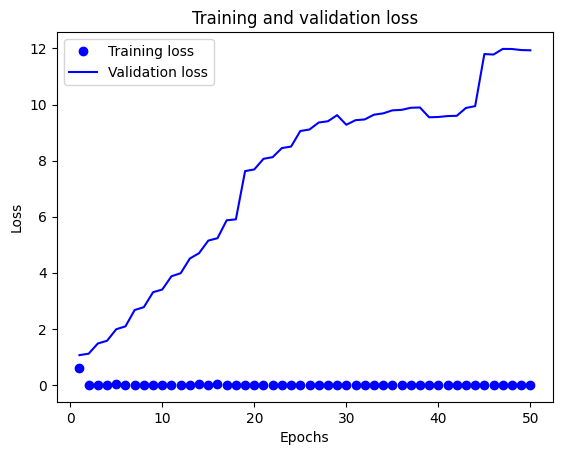

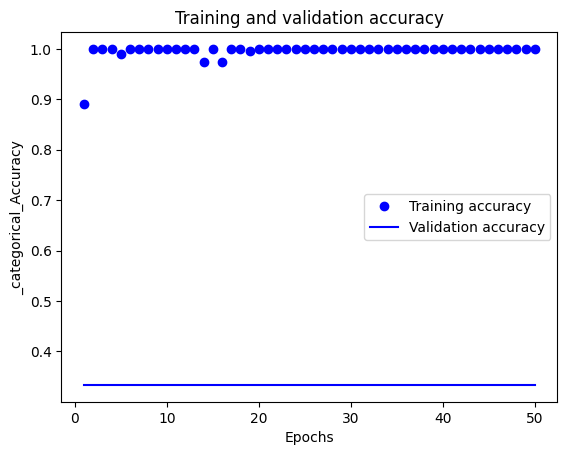

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.3357 - loss: 11.8921


test_acc: 0.3333333432674408


In [ ]:
history = model.fit( # The image data must come from the image generator that takes the images from the correct dirrectory. https://keras.io/models/sequential/
    train_generator, # Images are taken from the train_generator
    steps_per_epoch=10, # The number of steps from the train_generator before one epoch if finished.
                         # 100 steps * 20 batch size in train generator = 2000 training images per epoch. This way each traning image will be sampled once per epoch.
    epochs=50, # Train data for 50 epochs
    validation_data=validation_generator, # Take data from the validataion generator
    validation_steps=50, # 50 steps * 20 batch size in validation generator = 1000 validation images per epoch
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, restore_best_weights = True)]) # We will not use call backs to stop early.

plot_history(history) # Use our plot function to plot the loss and accuracy.

test_loss, test_acc =model.evaluate(test_generator, steps = 50) # Test images are in a dirrectory so they must flow from dirrectory.
                                                                           # 50 steps * 20 batch size in test generator = 1000 test images per epoch
print('test_acc:', test_acc)

model.save('phm_pic_base.h5')